<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [ ]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [43]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import imblearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
sns.set(style = 'ticks')

In [44]:
# Read data in pandas
df = pd.read_csv('transfusion.csv')

# Check data has loaded correctly
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [45]:
# Perform EDA by investigating each of the points above 
df.shape

(748, 5)

In [46]:
df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [47]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [48]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [49]:
# Renaming the columns
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated_Mar_2007']
df.head()

,Recency,Frequency,Monetary,Time,Donated_Mar_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [50]:
# For data type
print(df.dtypes)

# For column names
sorted(df)



Recency             int64
Frequency           int64
Monetary            int64
Time                int64
Donated_Mar_2007    int64
dtype: object


['Donated_Mar_2007', 'Frequency', 'Monetary', 'Recency', 'Time']

In [51]:

# For Domains, Intervals
print('\n- Domains, Intervals')
for i in df.columns:
    x = df[i].unique()
    x.sort()
    print('  - %-16s: min: %d, max: %d' % (i, df[i].min(), df[i].max()))
    print('    values: %s' % x)



- Domains, Intervals
  - Recency         : min: 0, max: 74
    values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 25
 26 35 38 39 40 72 74]
  - Frequency       : min: 1, max: 50
    values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 26 33 34 38 41 43 44 46 50]
  - Monetary        : min: 250, max: 12500
    values: [  250   500   750  1000  1250  1500  1750  2000  2250  2500  2750  3000
  3250  3500  3750  4000  4250  4500  4750  5000  5250  5500  5750  6000
  6500  8250  8500  9500 10250 10750 11000 11500 12500]
  - Time            : min: 2, max: 98
    values: [ 2  3  4  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 49 50 51 52 53 54 55
 57 58 59 60 61 62 63 64 65 69 70 71 72 73 74 75 76 77 78 79 81 82 83 86
 87 88 89 93 95 98]
  - Donated_Mar_2007: min: 0, max: 1
    values: [0 1]


In [52]:

print('\n- Nulls')
for i in df.columns:
    print('  - %-16s: Nulls: %d' % (i, df[i].isna().sum()))


- Nulls
  - Recency         : Nulls: 0
  - Frequency       : Nulls: 0
  - Monetary        : Nulls: 0
  - Time            : Nulls: 0
  - Donated_Mar_2007: Nulls: 0


In [53]:
# For statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary,748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
Donated_Mar_2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

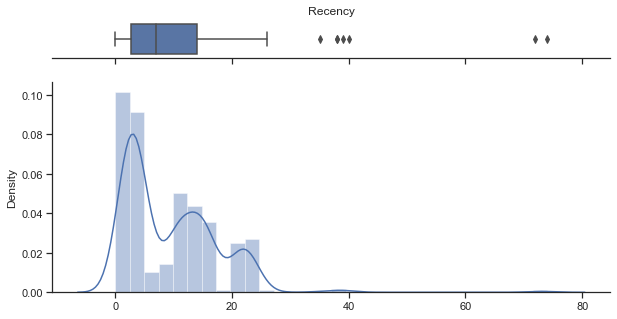

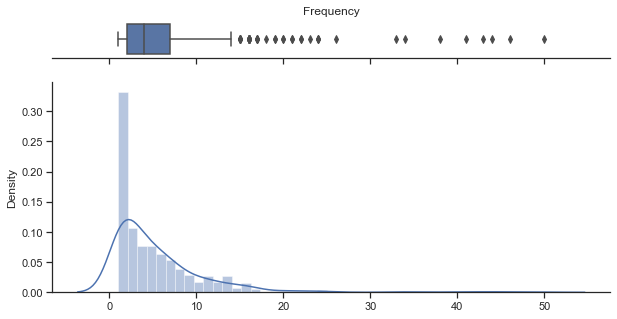

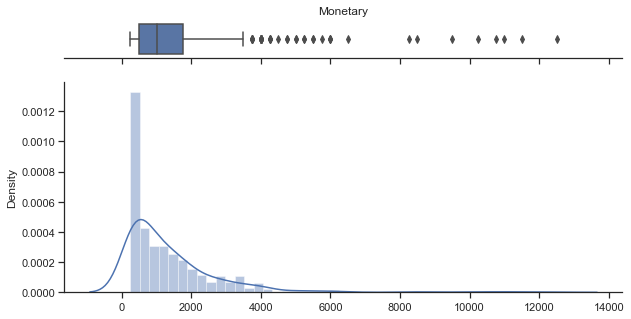

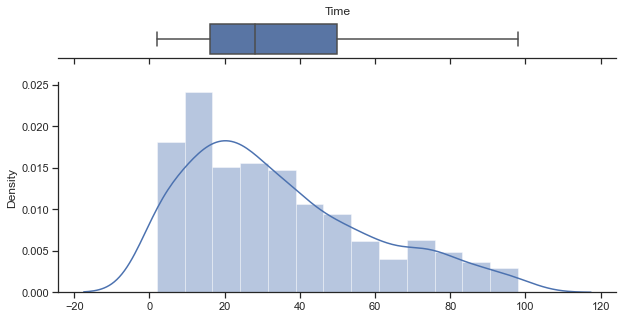

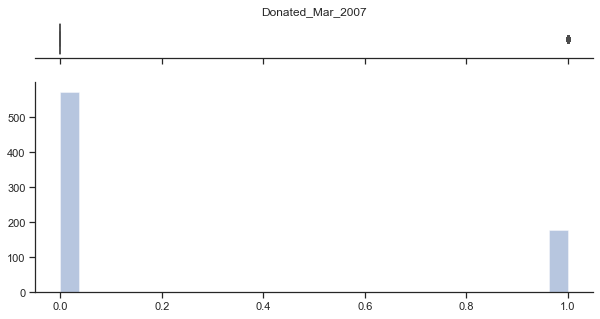

In [54]:
# Check for Outliers
for c in df.columns:
    fig, ax = plt.subplots(2, 
                           figsize = (10, 5),
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)
    
    ax_hist = ax[1]
    
    if c == 'Donated_Mar_2007':       
        ax_hist = sns.distplot(df[c], kde=False, ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
    else:
        ax_hist = sns.distplot(df[c], ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
        

plt.show()

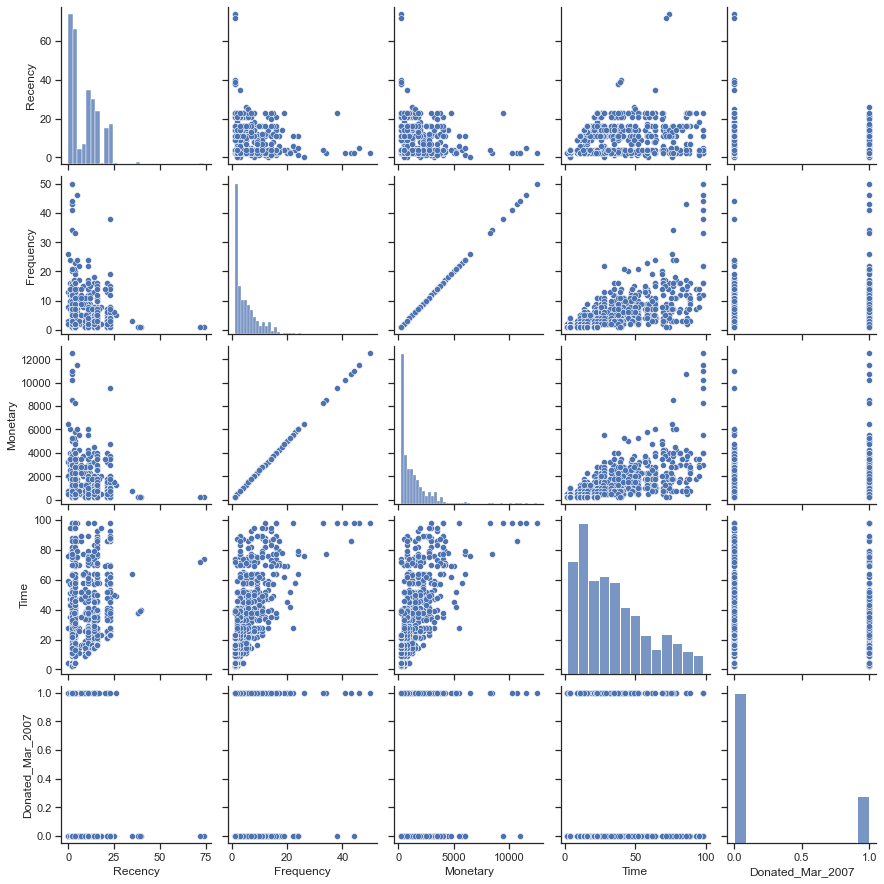

In [31]:
sns.pairplot(data = df, kind = 'scatter');

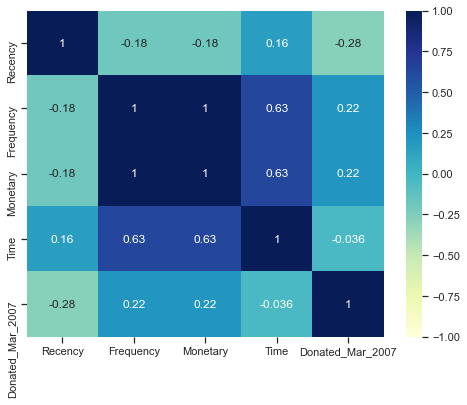

In [55]:
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [249]:
# Defining input and output variables

output = 'Donated_Mar_2007'
features = [i for i in df.columns if i != output]
# Setting x and y
x = df[features].copy()

y = df[output].copy()




In [250]:
#checking for normalization
 
y.value_counts(normalize = True)

0    0.762032
1    0.237968
Name: Donated_Mar_2007, dtype: float64

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [251]:
from sklearn.feature_selection import SelectFromModel
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

In [252]:
# Split your data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2, stratify = y)                                                
                                                 




In [253]:
# Handling the imbalance class
oversample = SMOTETomek()
x_train, y_train = oversample.fit_resample(x_train, y_train)

# Scaling the dataset
from sklearn.preprocessing import QuantileTransformer
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

In [254]:
y_train.value_counts(normalize = True)

1    0.5
0    0.5
Name: Donated_Mar_2007, dtype: float64

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [255]:
# Choose a model or models
model = RandomForestClassifier(random_state = 1,n_jobs = -1)
print(model)

RandomForestClassifier(n_jobs=-1, random_state=1)


# Step 9: Fit the Model

In [256]:
# Fit model
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.9249329758713136

In [274]:
model.score(x_test, y_test)

0.9466666666666667

[0.2896162  0.12912776 0.1329277  0.44832834]


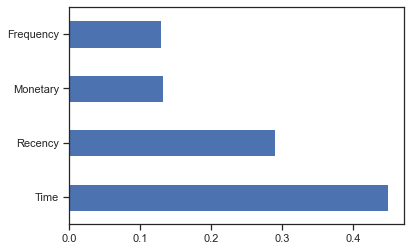

In [258]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model = model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based class
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

Accuracy =  0.9249329758713136
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       373
           1       0.98      0.87      0.92       373

    accuracy                           0.92       746
   macro avg       0.93      0.92      0.92       746
weighted avg       0.93      0.92      0.92       746



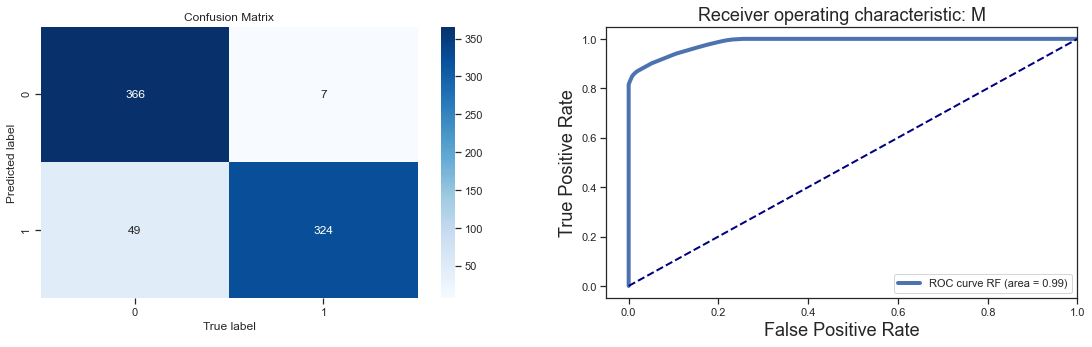

In [275]:

model.fit(x_train,y_train)
y_pred=model.predict(x_train)
ac = accuracy_score(y_train,y_pred)
print('Accuracy = ',ac)
cm = confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))
yhat = model.predict_proba(x_train)
probs = yhat[:,1]
fpr, tpr,_ = roc_curve(y_train, probs)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
             
        
        # Confusion matrix
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues', ax = ax[0]);    
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('True label')
ax[0].set_ylabel('Predicted label')
        
         #ROC Curve
ax[1].plot(fpr, tpr, label='ROC curve RF (area = %0.2f)' % auc(fpr, tpr), linewidth=4)
ax[1].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
ax[1].set_xlim([-0.05, 1.0])
ax[1].set_ylim([-0.05, 1.05])
ax[1].set_xlabel('False Positive Rate', fontsize=18)
ax[1].set_ylabel('True Positive Rate', fontsize=18)
ax[1].set_title('Receiver operating characteristic: M', fontsize=18)
ax[1].legend(loc="lower right")


plt.show()


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

Accuracy =  0.9466666666666667
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       171
           1       0.98      0.80      0.88        54

    accuracy                           0.95       225
   macro avg       0.96      0.90      0.92       225
weighted avg       0.95      0.95      0.94       225



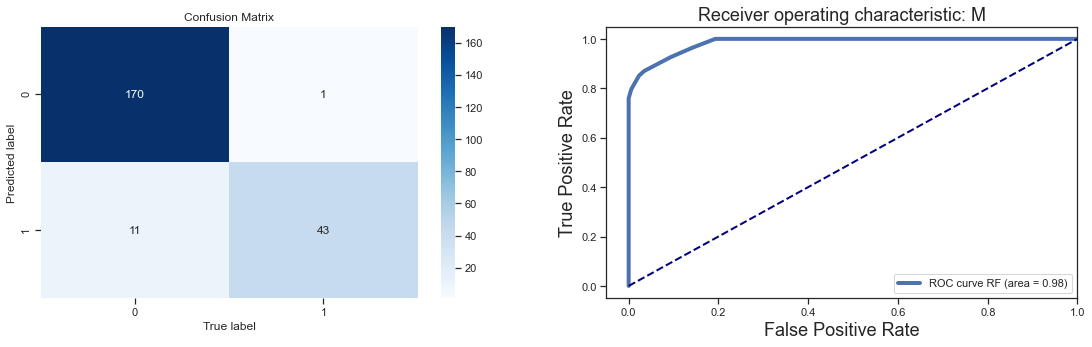

In [276]:
# Evaluate model against test set
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy = ',ac)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

yhat = model.predict_proba(x_test)
probs = yhat[:,1]
fpr, tpr,_ = roc_curve(y_test, probs)


fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
             
        
        # Confusion matrix
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues', ax = ax[0]);    
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('True label')
ax[0].set_ylabel('Predicted label')
        
         #ROC Curve
ax[1].plot(fpr, tpr, label='ROC curve RF (area = %0.2f)' % auc(fpr, tpr), linewidth=4)
ax[1].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
ax[1].set_xlim([-0.05, 1.0])
ax[1].set_ylim([-0.05, 1.05])
ax[1].set_xlabel('False Positive Rate', fontsize=18)
ax[1].set_ylabel('True Positive Rate', fontsize=18)
ax[1].set_title('Receiver operating characteristic: M', fontsize=18)
ax[1].legend(loc="lower right")


plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



